## Importações

In [991]:
import pandas as pd
from math import floor
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.naive_bayes import GaussianNB
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import norm
from sklearn.metrics import accuracy_score,classification_report, f1_score, confusion_matrix,recall_score,precision_score

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

## Funções Comuns

In [992]:
def funcPlotMatriz(y_test, classificar):
    matriz_de_confusao = confusion_matrix(y_test, classificar)
    sns.heatmap(matriz_de_confusao, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
    plt.show()


def funcMetricas(modelo_Versao, y_test, classificar):
    df_metricas = pd.DataFrame(columns=['Modelo','Acuracia','Recall_Media', 'Precision_Media', 'F1_Score_Media'])
    metricas = [
        modelo_Versao,
        accuracy_score(y_test, classificar), 
        round(recall_score(y_test, classificar, pos_label=0,average='macro'),2),
        round(precision_score(y_test, classificar, pos_label=0,average='macro'),2),
        round(f1_score(y_test, classificar, pos_label=0,average='macro'),2)
        ]
    
    nova_linha_df = pd.DataFrame([metricas], columns=df_metricas.columns)

    df_metricas = pd.concat([df_metricas, nova_linha_df], ignore_index=True)
    
    return df_metricas



## Extraindo a Base

In [993]:
df_original = pd.read_excel('..\dados\df_original.xlsx')

df = df_original.copy()

display(df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.620000,64.000000,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.520000,56.000000,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800000,77.000000,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800000,87.000000,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.780000,89.800000,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,1.710730,131.408528,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,1.748584,133.742943,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,1.752206,133.689352,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


### Dividindo o Dataframe em Valore Explicativo e Resposta

In [994]:
df_x ,df_y= df.iloc[:, :-1],df.iloc[:, -1]

df_y = pd.DataFrame(df_y)
display(df_x)
display(df_y)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21,1.620000,64.000000,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation
1,Female,21,1.520000,56.000000,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation
2,Male,23,1.800000,77.000000,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation
3,Male,27,1.800000,87.000000,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking
4,Male,22,1.780000,89.800000,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,1.710730,131.408528,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation
2107,Female,21,1.748584,133.742943,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation
2108,Female,22,1.752206,133.689352,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation
2109,Female,24,1.739450,133.346641,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation


,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


### Transformando os Dados Qualitativos em Quantitativo

In [995]:
label_encolder = LabelEncoder()

preprocessador = ColumnTransformer(
    transformers=[
        ('categoria', OrdinalEncoder(), make_column_selector(dtype_include=['object','bool']))
    ],
    remainder='passthrough',  # Mantém as outras colunas inalteradas
    verbose_feature_names_out=False,  # Mantém os nomes originais das colunas
    
)

# Ajustar e transformar o DataFrame usando o preprocessador
df_x_encoded = preprocessador.fit_transform(df_x)

df_y_encoded = label_encolder.fit_transform(df_y)
# Se necessário, converter o resultado de volta para um DataFrame, mantendo os nomes das colunas
df_x_encoded = pd.DataFrame(df_x_encoded, columns=preprocessador.get_feature_names_out())
df_y_encoded = pd.DataFrame(df_y_encoded, columns=df_y.columns)

# df_x_encoded=df_x_encoded[df_x.columns]

df_encoded = df_x_encoded.copy()
df_encoded['NObeyesdad']=df_y_encoded
df_encoded

display(df_x_encoded)
display(df_y_encoded)

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.0,1.0,0.0,2.0,0.0,0.0,3.0,3.0,21.0,1.620000,64.000000,2.0,3.0,2.0,0.0,1.0
1,0.0,1.0,0.0,2.0,1.0,1.0,2.0,3.0,21.0,1.520000,56.000000,3.0,3.0,3.0,3.0,0.0
2,1.0,1.0,0.0,2.0,0.0,0.0,1.0,3.0,23.0,1.800000,77.000000,2.0,3.0,2.0,2.0,1.0
3,1.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,27.0,1.800000,87.000000,3.0,3.0,2.0,2.0,0.0
4,1.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,22.0,1.780000,89.800000,2.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,20.0,1.710730,131.408528,3.0,3.0,2.0,2.0,1.0
2107,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,21.0,1.748584,133.742943,3.0,3.0,2.0,1.0,1.0
2108,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,22.0,1.752206,133.689352,3.0,3.0,2.0,1.0,1.0
2109,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,24.0,1.739450,133.346641,3.0,3.0,3.0,1.0,1.0


,NObeyesdad
0,1
1,1
2,1
3,5
4,6
...,...
2106,4
2107,4
2108,4
2109,4


#### Dividindo os DataFrames de Teste e Treino

In [996]:
df_y_encoded.value_counts()

NObeyesdad
2             351
4             324
3             297
5             290
6             290
1             287
0             272
dtype: int64

In [997]:
X_train, X_test, y_train, y_test = train_test_split(df_x_encoded, df_y_encoded, test_size=0.25,random_state=42,shuffle=True)

# Salva o array na memoria para guardar a ordem das colunas
# X_train = np.ascontiguousarray(X_train)
# X_test = np.ascontiguousarray(X_test)

## Modelos GaussianNB

### Teste Simples

In [998]:
classificador_bayes = GaussianNB()

scores = cross_validate(classificador_bayes, X_train, y_train, cv=5, scoring=['accuracy','precision_macro','recall_macro','f1_macro'])
chaves = ['test_accuracy','test_precision_macro','test_recall_macro','test_f1_macro']

scores_avg = [scores[chave].mean() for chave in chaves] 

print(scores)
print(scores_avg)


c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\s

{'fit_time': array([0.00499558, 0.00801492, 0.00801682, 0.00822902, 0.00500011]), 'score_time': array([0.04192376, 0.04319167, 0.03322172, 0.03207755, 0.04973173]), 'test_accuracy': array([0.63091483, 0.58990536, 0.57097792, 0.59810127, 0.59493671]), 'test_precision_macro': array([0.64669084, 0.63009078, 0.60692935, 0.63850656, 0.61554283]), 'test_recall_macro': array([0.62677124, 0.58303723, 0.57180792, 0.58341858, 0.58939977]), 'test_f1_macro': array([0.6021248 , 0.56833598, 0.54222647, 0.54278095, 0.56821936])}
[0.596967216387813, 0.6275520726561208, 0.5908869488305444, 0.5647375100504771]


## Teste Simples do Modelo 

In [999]:
classificador_bayes.fit(X_train, y_train)
classificar = classificador_bayes.predict(X_test)
print(classification_report(y_test,classificar))

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.67      0.88      0.76        68
           1       0.52      0.33      0.41        78
           2       0.42      0.61      0.50        94
           3       0.69      0.92      0.79        75
           4       0.96      0.99      0.97        79
           5       0.45      0.28      0.35        71
           6       0.54      0.24      0.33        63

    accuracy                           0.62       528
   macro avg       0.61      0.61      0.59       528
weighted avg       0.61      0.62      0.59       528



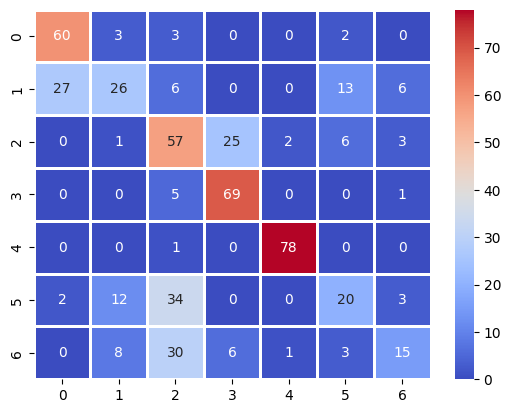

In [1000]:
funcPlotMatriz(y_test, classificar)

## Entendendo o Resultado do Modelo

### Distribuição dos Dados

C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_19676\382664771.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True, color="b", ax=axs[0, 0])
C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_19676\382664771.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Height'], shade=True, color="b", ax=axs[0, 1])
C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_19676\382664771.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Weight'], shade=True, color="b", ax=axs[0, 2])
C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_19676\382664771.py:7: UserWarning: 

`distplot

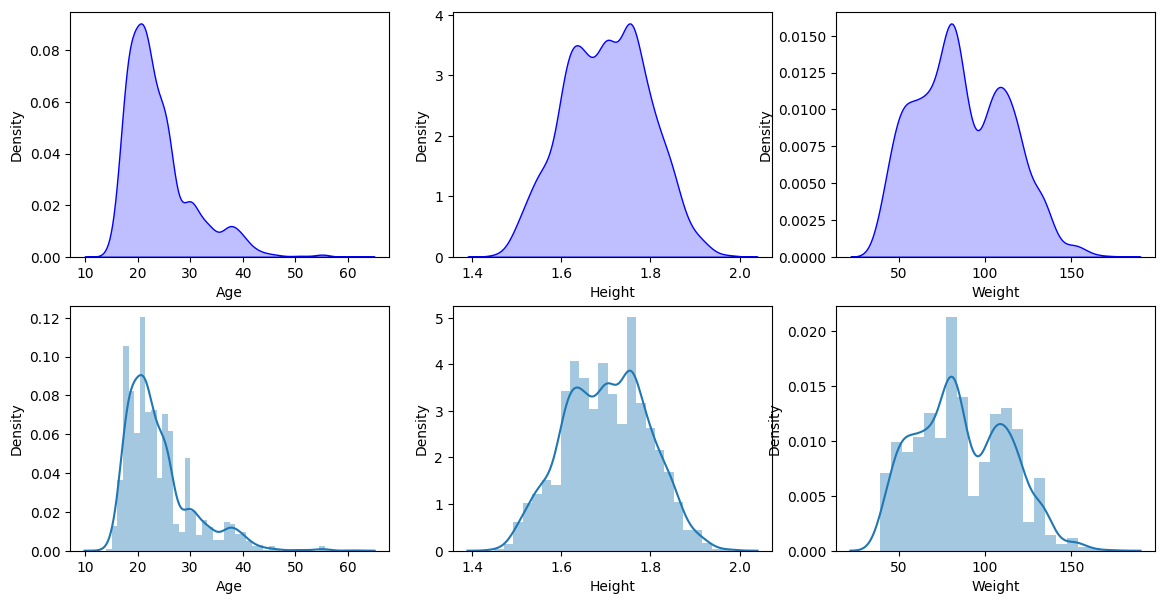

In [1001]:
fig, axs = plt.subplots(2, 3, figsize=(14, 7))

sns.kdeplot(df['Age'], shade=True, color="b", ax=axs[0, 0])
sns.kdeplot(df['Height'], shade=True, color="b", ax=axs[0, 1])
sns.kdeplot(df['Weight'], shade=True, color="b", ax=axs[0, 2])

sns.distplot( a=df["Age"], hist=True, kde=True, rug=False, ax=axs[1, 0])
sns.distplot( a=df["Height"], hist=True, kde=True, rug=False, ax=axs[1, 1])
sns.distplot( a=df["Weight"], hist=True, kde=True, rug=False, ax=axs[1, 2])

plt.show()

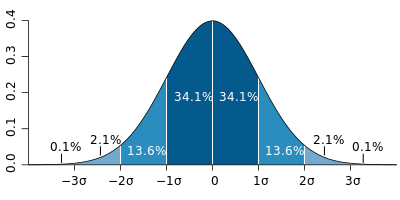

O modelo "GaussianNB" assume que os dados quantitativos seguem uma distribuição normal (Gaussiana), ao analizarmos os graficos plotados fica claro que as colunas "Age" e "Weght" estão bem diferentes da distribuição normal, por outro lado, a coluna "Height" se aproxima muito da distribuição normal.

Além disso, o dataset possui em grande maioria colunas qualitativas, que não se adequam bem ao modelo GaussianNB.
Quando codificamos estas colunas com OrdinalEncoderm, o modelo tratá elas como se fossem valores quantitativos, aplicando a suposição de distribuição normal. Assim levando a irregularidades no modelo, já que variáveis categóricas não seguem distribuições gaussianas (na maioria dos casos).

Com as plotagens a baixo, se comprova a disregularidade na distribuição das colunas qualitativas transformadas em quantitativas. Mostrando sua deistribuição e como seria a distribuição normal.

C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_19676\3760981640.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_encoded[col], shade=True, color="b", ax=axs[i])
C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_19676\3760981640.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_encoded[col], shade=True, color="b", ax=axs[i])
C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_19676\3760981640.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_encoded[col], shade=True, color="b", ax=axs[i])
C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_19676\3760981640.py:6: FutureWarning: 



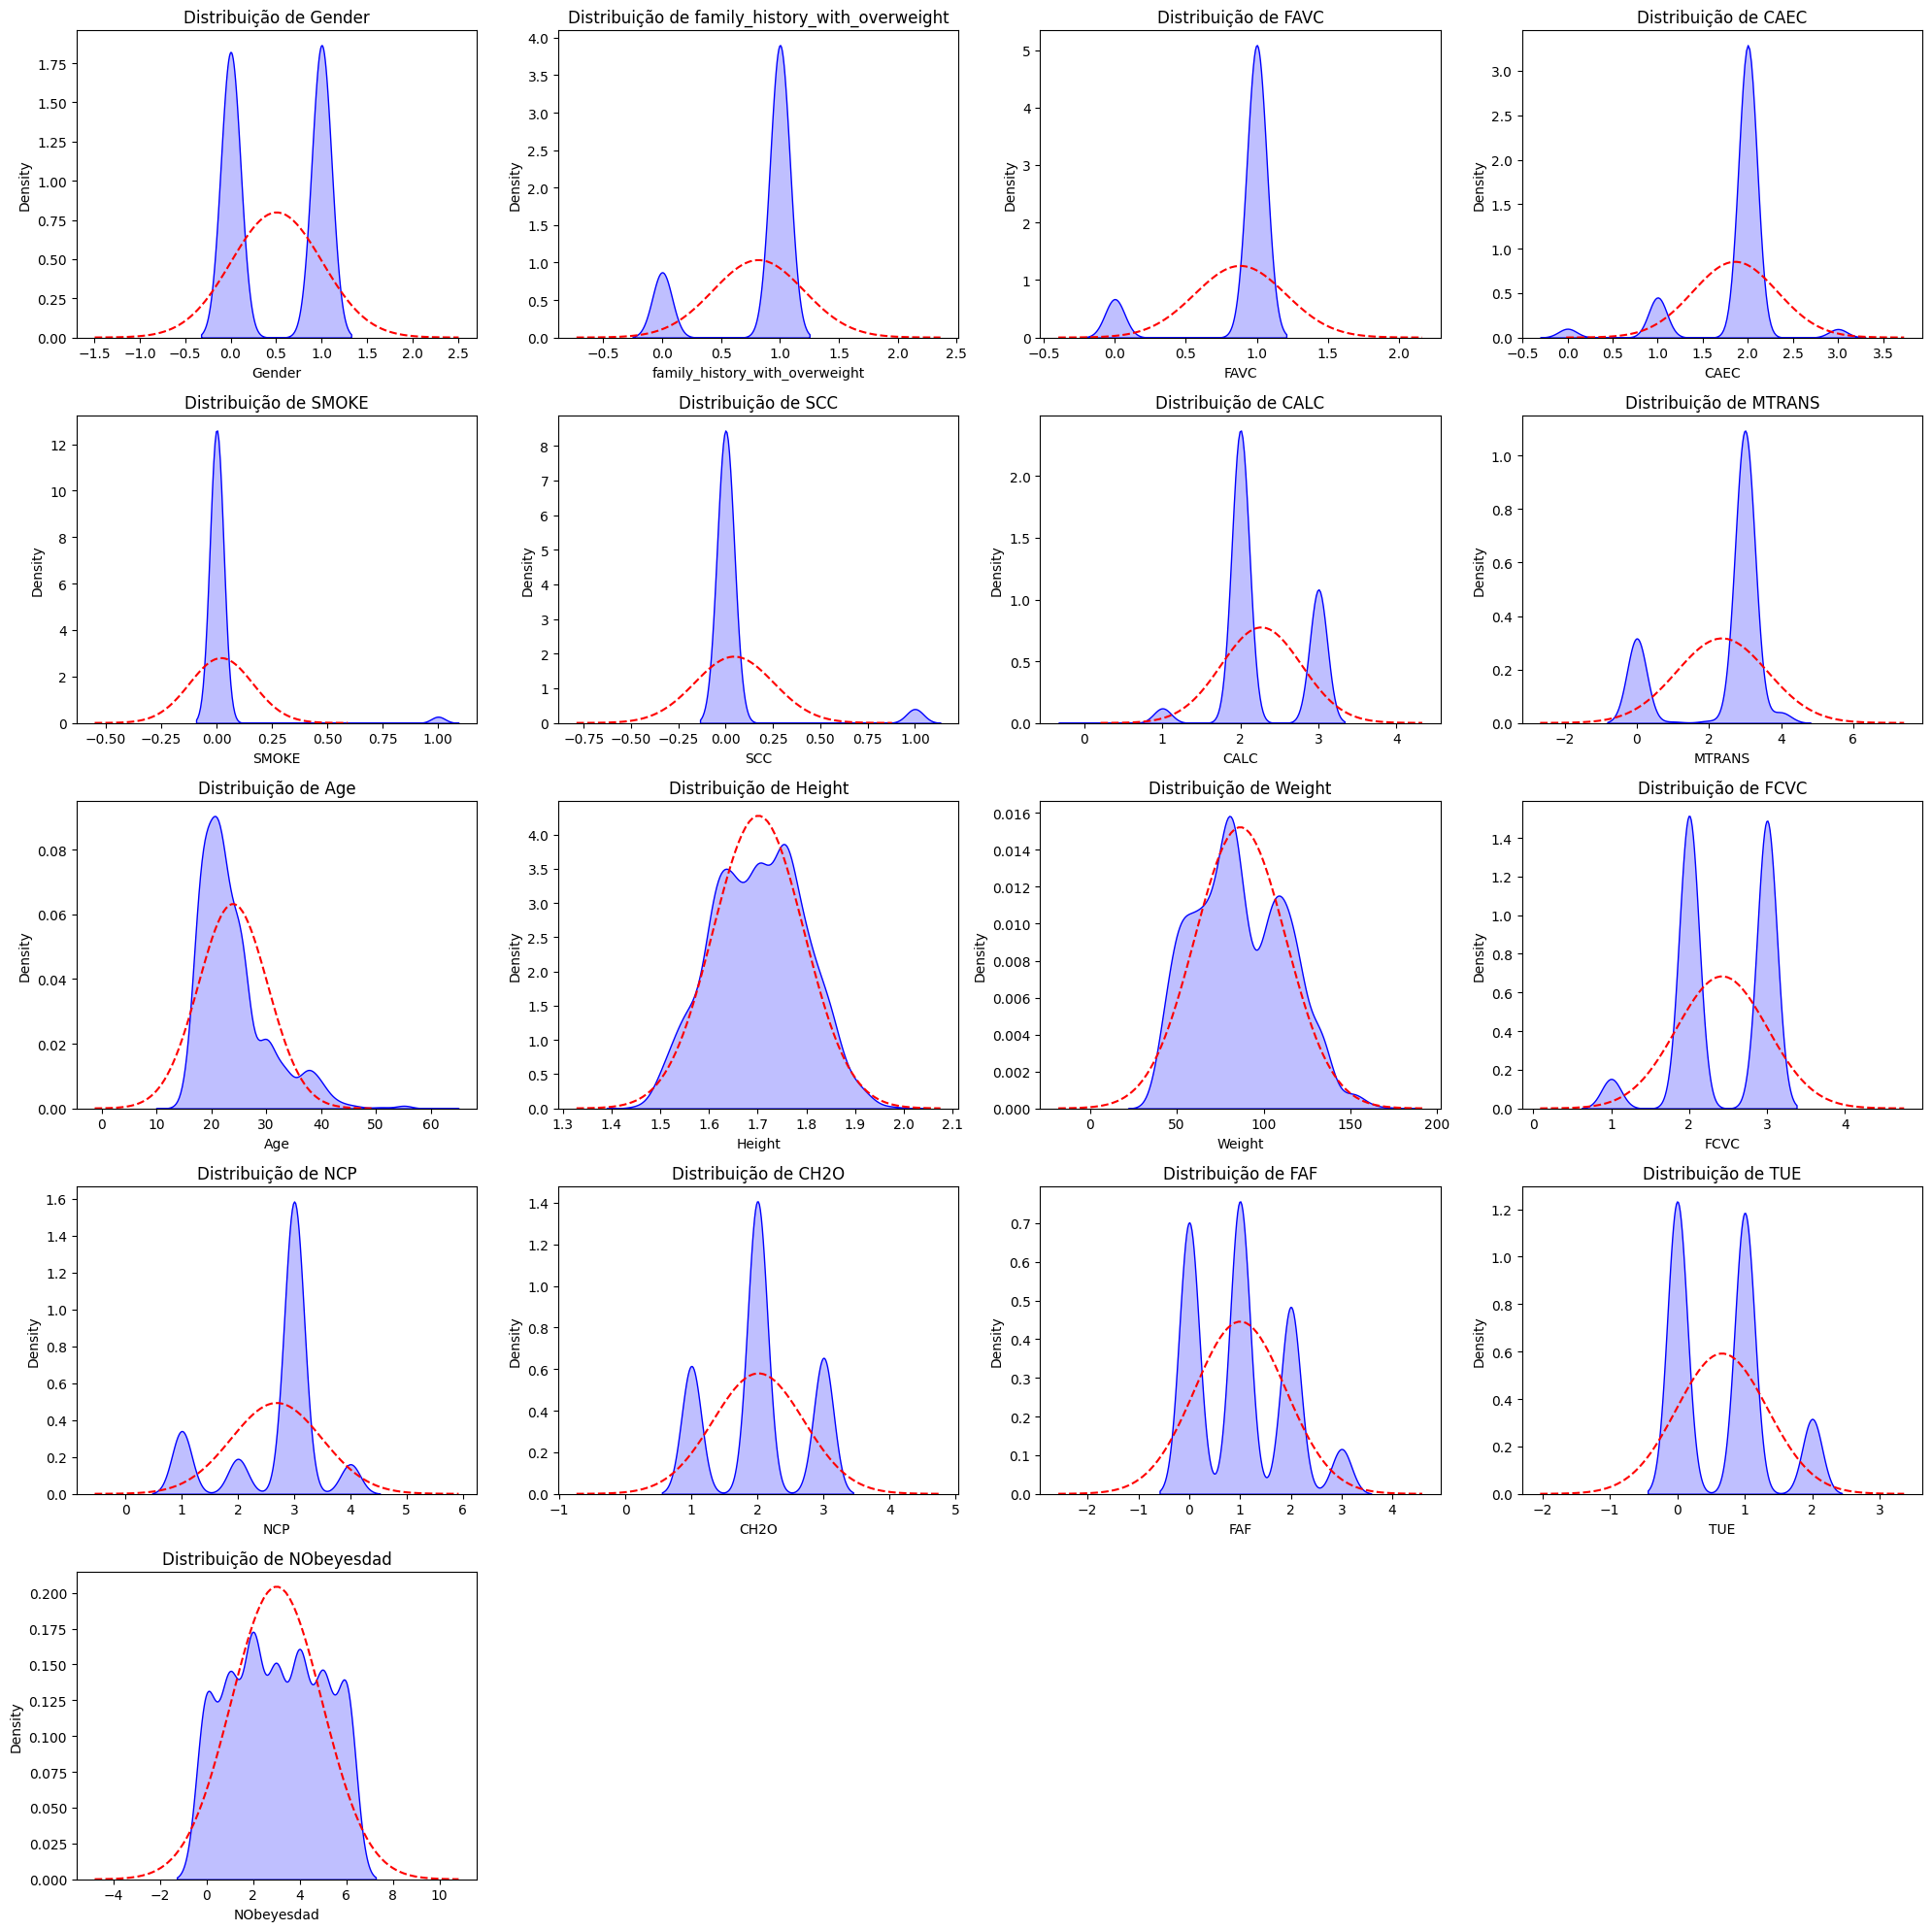

In [1002]:
fig, axs = plt.subplots(int(np.ceil(len(df_encoded.columns) / 4)), 4, figsize=(20, 20))
axs = axs.flatten()  # Aplanar a matriz de eixos para fácil indexação

for i, col in enumerate(df_encoded.columns):
    # Plotar a distribuição da coluna com KDE
    sns.kdeplot(df_encoded[col], shade=True, color="b", ax=axs[i])
    
    mean = df_encoded[col].mean()
    std = df_encoded[col].std()
    
    x = np.linspace(mean - 4*std, mean + 4*std, 100)
    y = norm.pdf(x, mean, std)
    
    axs[i].plot(x, y, color='r', linestyle='--')
    
    axs[i].set_title(f'Distribuição de {col}')

for j in range(len(df_encoded.columns), len(axs)):
    fig.delaxes(axs[j])

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

### Correlação das Variáveis

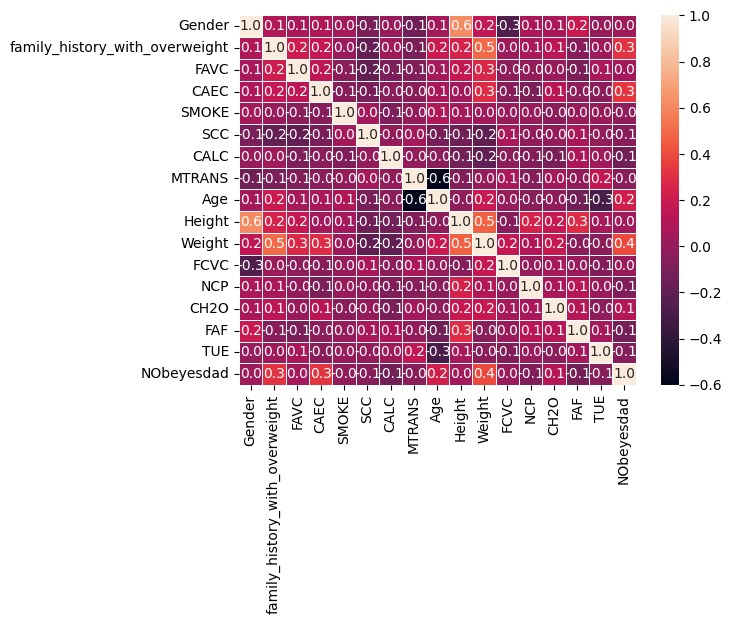

In [1003]:
correlation = df_encoded[df_encoded.columns.to_list()].corr()

sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plt.show()

Plotando a matriz de correlação é possivel dizer que as variaveis são independentes, por conterem pouquíssima correlação entre sí (números muito proximos a 0),  ponto positivo para o modelo, por conta do algoritmo Naive Bayes é um classificador probabilístico que assume que as características (features) são independentes entre si, daí o termo “naive” (ingênuo). Essa é uma simplificação feita para facilitar o cálculo das probabilidades condicionais necessárias para classificação.

### Maldição da Dimensionalidade

In [1004]:
len(df_x.columns)

16

Outro fator que pode estar prejudicando o desempenho do modelo é a alta quantidade de dimensões (colunas). Esse problema é denominado "Maldição da Dimensionalidade", termo introduzido pelo matemático R. Bellman, que se refere ao problema causado pelo aumento exponencial no volume associado à adição de dimensões extras a um espaço matemático.

Por exemplo:

Se dividirmos uma região do espaço em células regulares, o número de células cresce exponencialmente com a dimensão do espaço. Vamos denominar a dimensão como 
𝐷 e as células como 𝑁.


Se tivermos uma dimensão 𝐷1, com um número qualquer de células como 𝑁:


Ao aumentarmos uma dimensão, passando a ter 𝐷2, precisaremos ter o número de células como 𝑁^2.


Assim como 𝐷3 passaria a ter 𝑁^3, e assim por diante.


O que quero dizer é que, para um número qualquer de dimensões, é necessário ter a quantidade certa de amostras de dados. Isso nos leva a pensar que essa quantidade de amostras pode ser insuficiente ou excedente para essa quantidade de dimensões.

Algumas imagens que ilustram a explicação:

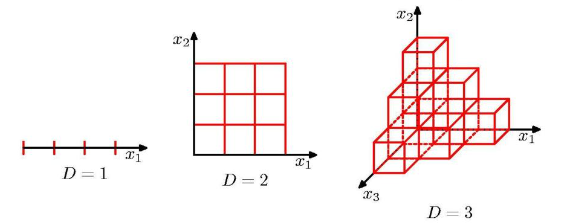

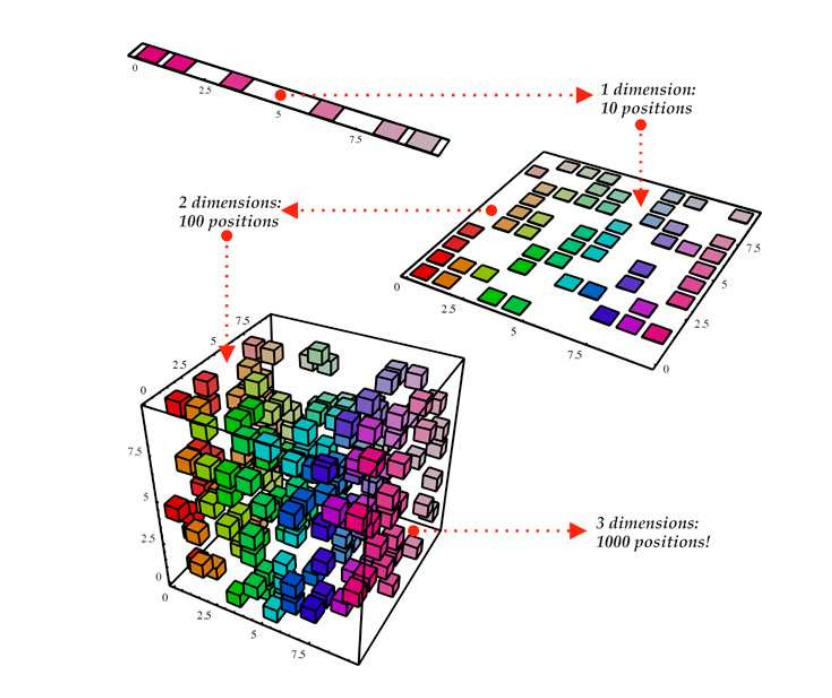

### Distribuição das Classes Resposta

Iremos verificar a distribuição das classes, por conta do GaussianNB se comportar mal com classes desbalanceadas. Ele tende a priorizar as classes majoritárias e pode ter dificuldade em prever corretamente as classes minoritárias.

In [1005]:
display(df_y_encoded.value_counts())
display(y_train.value_counts())
display(y_test.value_counts())

NObeyesdad
2             351
4             324
3             297
5             290
6             290
1             287
0             272
dtype: int64

NObeyesdad
2             257
4             245
6             227
3             222
5             219
1             209
0             204
dtype: int64

NObeyesdad
2             94
4             79
1             78
3             75
5             71
0             68
6             63
dtype: int64

As classes resposta estão bem balanceadas, sem mostrar grandes disparidades

## Teste do Modelo Embazado Nos Resultados Anteriores e em Obter o Melhor Desempenho Possível do Modelo

### PIPELINE

In [1006]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

#### Importando todas as bases alteradas em análise exploratoria

In [1007]:
lista_df = []

In [1008]:
df_capping = pd.read_excel('..\dados\df_capping.xlsx')
display(df_capping.head(2))
lista_df.append(df_capping)

df_iqr = pd.read_excel('..\dados\df_iqr.xlsx')
display(df_iqr.head(2))
lista_df.append(df_iqr)

df_log = pd.read_excel('..\dados\df_log.xlsx')
display(df_log.head(2))
lista_df.append(df_log)

df_raiz = pd.read_excel('..\dados\df_raiz.xlsx')
display(df_raiz.head(2))
lista_df.append(df_raiz)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,3.091042,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,3.091042,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,4.582576,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,4.582576,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight


In [1009]:
for k,v in enumerate(lista_df):
    lista_df[k] = preprocessador.fit_transform(v)
    lista_df[k] = pd.DataFrame(lista_df[k], columns=preprocessador.get_feature_names_out())

[      Gender  Age    Height      Weight family_history_with_overweight FAVC  \
 0     Female   21  1.620000   64.000000                            yes   no   
 1     Female   21  1.520000   56.000000                            yes   no   
 2       Male   23  1.800000   77.000000                            yes   no   
 3       Male   27  1.800000   87.000000                             no   no   
 4       Male   22  1.780000   89.800000                             no   no   
 ...      ...  ...       ...         ...                            ...  ...   
 2106  Female   20  1.710730  131.408528                            yes  yes   
 2107  Female   21  1.748584  133.742943                            yes  yes   
 2108  Female   22  1.752206  133.689352                            yes  yes   
 2109  Female   24  1.739450  133.346641                            yes  yes   
 2110  Female   23  1.738836  133.472641                            yes  yes   
 
       FCVC  NCP       CAEC SMOKE  CH2

In [1010]:
#X_train, X_test, y_train, y_test = train_test_split(df_x_encoded, df_y_encoded, test_size=0.3,random_state=42,shuffle=True)
pipe = Pipeline([()
                ('pca', PCA()),
                ('model', GaussianNB())])

params_pipe = {
    'pre1__num__scaler': [StandardScaler(), MinMaxScaler()],
    'pca__n_components' : [1,2,3,4,5,6,7,None],
}

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

<>:2: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:2: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
C:\Users\arthurdomingos-ieg\AppData\Local\Temp\ipykernel_19676\3331044549.py:2: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  pipe = Pipeline([()


TypeError: 'tuple' object is not callable

In [960]:
resultado_pipeline = pipe.predict(X_test)
print(classification_report(y_test,resultado_pipeline))

              precision    recall  f1-score   support

           0       0.69      0.91      0.78        68
           1       0.48      0.37      0.42        78
           2       0.56      0.73      0.63        94
           3       0.79      0.88      0.83        75
           4       0.99      0.99      0.99        79
           5       0.66      0.46      0.55        71
           6       0.54      0.35      0.42        63

    accuracy                           0.68       528
   macro avg       0.67      0.67      0.66       528
weighted avg       0.67      0.68      0.67       528



In [ ]:
#treinando modelo com Naive bayes e analisando métricas resultantes
pipeline = Pipeline([
    ('pre1',pre1),
    ('dim',PCA()),
    ('model',GaussianNB())])


params_pipe = {
    'pre1__num__scaler': [StandardScaler(), MinMaxScaler()],
    'pca__n_components' : [1,2,3,4,5,6,7,None],
}


grid = GridSearchCV(estimator=pipeline,param_grid = params_pipe, n_jobs=-1, scoring=metrica)

grid.fit(x_treino,y_treino)



#mostrando melhores parametros, classification report e recall do modelo, prestando atenção especialmente no recall pois é o mais vantajoso para nosso caso
melhor = grid.best_params_
classificador_grafico = grid.best_estimator_ 
print("Melhores parametros: ",melhor)
print("Melhor ",metricatxt,": ",grid.best_score_)
previsao = classificador_grafico.predict(x_teste)
temp3 = classification_report(y_teste,previsao)
print(temp3)

In [990]:
display(lista_df[0])

array([[0., 1., 0., ..., 2., 0., 1.],
       [0., 1., 0., ..., 3., 3., 0.],
       [1., 1., 0., ..., 2., 2., 1.],
       ...,
       [0., 1., 1., ..., 2., 1., 1.],
       [0., 1., 1., ..., 3., 1., 1.],
       [0., 1., 1., ..., 3., 1., 1.]])